In [1]:
import tensorflow as tf 
import pandas as pd 
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense

## Data Processing

In [2]:
data_path = './archive/'

In [3]:
data = pd.read_csv(data_path + 'train.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
all_features = data.columns.to_list()
print(all_features)

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [5]:
remove_features = ['v.id', 'on road old', 'on road now']
features = [feature for feature in all_features if feature not in remove_features]
print(features)

['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [6]:
# sns.pairplot(data[features], diag_kind='kde')

In [7]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Convert data to tensor data

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data.shape)
print(tensor_data)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.770000e+02 6.807710e+05 8.422830e+05 4.000000e+00 5.226600e+04
  3.000000e+00 5.000000e+00 1.300000e+01 1.390000e+02 1.000000e+02
  1.240000e+02 5.539010e+05]
 [9.920000e+02 5.935440e+05 8.443330e+05 2.000000e+00 1.443220e+05
  3.000000e+00 6.000000e+00 1.300000e+01 1.800000e+02 5.400000e+01
  7.000000e+01 1.458805e+05]
 [4.740000e+02 6.474220e+05 7.507740e+05 2.000000e+00 1.322150e+05
  3.000000e+00 7.000000e+00 1.200000e+01 1.370000e+02 1.000000e+02
  1.080000e+02 1.789915e+05]
 [1.870000e+02 6.794770e+05 7.648030e+05 6.000000e+00 8.726100e+04
  2.000000e+00 9.000000e+00 1.400000e+01 1.450000e+02 7.900000e+01
  7.900000e+01 3.989980e+05]
 [9.250000e+02 6.014390e+05 7.492640e+05 5.000000e+00 5.317400e+04
  2.000000e+00 4.000000e+00 1.300000e+01 1.380000e+02 1.170000e+02
  1.350000e+02 4.619005e+05]], shape=(5, 12), dtype=float32)


In [10]:
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[4.00000e+00 5.22660e+04 3.00000e+00 5.00000e+00 1.30000e+01 1.39000e+02
  1.00000e+02 1.24000e+02]
 [2.00000e+00 1.44322e+05 3.00000e+00 6.00000e+00 1.30000e+01 1.80000e+02
  5.40000e+01 7.00000e+01]
 [2.00000e+00 1.32215e+05 3.00000e+00 7.00000e+00 1.20000e+01 1.37000e+02
  1.00000e+02 1.08000e+02]
 [6.00000e+00 8.72610e+04 2.00000e+00 9.00000e+00 1.40000e+01 1.45000e+02
  7.90000e+01 7.90000e+01]
 [5.00000e+00 5.31740e+04 2.00000e+00 4.00000e+00 1.30000e+01 1.38000e+02
  1.17000e+02 1.35000e+02]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[553901. ]
 [145880.5]
 [178991.5]
 [398998. ]
 [461900.5]], shape=(5, 1), dtype=float32)


## Normalization
$$
\text{normalization} = \frac{X - \mu}{\sigma}, \quad \text{where $\mu$ = mean and $\sigma$ = std}
$$
```
Normalization()
```
Default axis = -1 means mean and std will be calculated based on columns, and then normalization will be performed along the columns.

In [12]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.3265004 , -1.6477422 ,  0.00855871, -0.20970275,  0.61674887,
        -1.4468273 ,  0.7536079 ,  0.9776139 ],
       [-1.4904958 ,  1.5117978 ,  0.00855871,  0.1445257 ,  0.61674887,
         0.679869  , -1.4895638 , -1.5879283 ],
       [-1.4904958 ,  1.0962622 ,  0.00855871,  0.49875417,  0.16820456,
        -1.5505686 ,  0.7536079 ,  0.21745327],
       [ 0.8374951 , -0.4466461 , -0.70466226,  1.207211  ,  1.0652932 ,
        -1.1356034 , -0.27044874, -1.1603379 ],
       [ 0.25549737, -1.6165779 , -0.70466226, -0.56393117,  0.61674887,
        -1.4986979 ,  1.5826062 ,  1.5002245 ]], dtype=float32)>

In [13]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1) # as we need only one output for current_price.
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


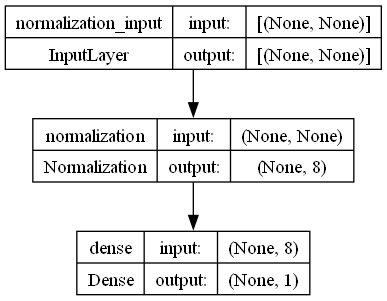

In [14]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)